# Gradient Boosting

In [1]:
# Modelo 
from sklearn.ensemble import GradientBoostingClassifier

# Entrenamiento 
from sklearn.model_selection import train_test_split, GridSearchCV

# Métricas
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix

# Gráficos
from matplotlib import pyplot as plt

# Otros
import preprocessing
import pandas as pd
import utils
import numpy as np

### Preprocessing base

In [2]:
df = utils.get_data()

In [3]:
params = { 'max_depth': range(1,8), 'loss': ('deviance', 'exponential'), 'max_features': ('sqrt', 'log2'), 'learning_rate': [0.005, 0.01, 0.05, 0.075, 0.1, 0.25, 0.5] }
model = GradientBoostingClassifier()

In [4]:
gscv = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, verbose=5)

In [5]:
X = df.drop('tiene_alto_valor_adquisitivo',1)
Y = df['tiene_alto_valor_adquisitivo']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, Y, random_state=112, stratify=Y)
X_train_1, X_test_1 = preprocessing.preprocessing_base_parte_1(X_train_1, X_test_1)

In [6]:
%%time
gscv.fit(X_train_1, y_train_1)
score = roc_auc_score(y_test_1, gscv.predict_proba(X_test_1)[:,1])

Fitting 5 folds for each of 196 candidates, totalling 980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 980 out of 980 | elapsed:  3.6min finished


CPU times: user 5.54 s, sys: 1.02 s, total: 6.55 s
Wall time: 3min 35s


In [7]:
gscv.best_params_

{'learning_rate': 0.5,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 'sqrt'}

In [8]:
gb_base = gscv.best_estimator_
gb_base.fit(X_train_1, y_train_1)

GradientBoostingClassifier(learning_rate=0.25, max_depth=5, max_features='sqrt')

In [9]:
score

0.9144803941638134

In [10]:
print(classification_report(y_test_1,gb_base.predict(X_test_1), digits=4))

              precision    recall  f1-score   support

           0     0.8808    0.9418    0.9102      6181
           1     0.7650    0.5980    0.6712      1960

    accuracy                         0.8590      8141
   macro avg     0.8229    0.7699    0.7907      8141
weighted avg     0.8529    0.8590    0.8527      8141



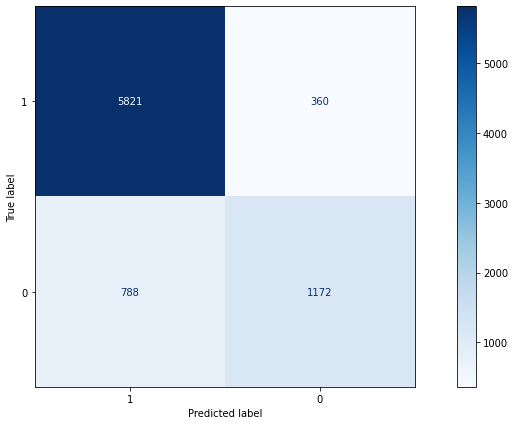

In [11]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gb_base, X_test_1, y_test_1, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

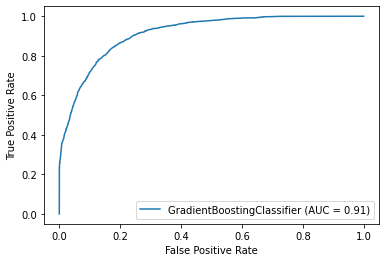

In [12]:
plot_roc_curve(gb_base, X_test_1, y_test_1)

### Preprocessing Significantes

In [13]:
df = utils.get_data()

In [15]:
params = { 'max_depth': range(1,8), 'loss': ('deviance', 'exponential'), 'max_features': ('sqrt', 'log2'), 'learning_rate': [0.005, 0.01, 0.05, 0.075, 0.1, 0.25, 0.5] }
model = GradientBoostingClassifier()

In [16]:
gscv = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, verbose=5)

In [17]:
X = df[df.columns.drop('tiene_alto_valor_adquisitivo')]
Y = df['tiene_alto_valor_adquisitivo']
X = pd.get_dummies(X, drop_first=True)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, Y, random_state=112, stratify=Y)
X_train_2, X_test_2 = preprocessing.preprocessing_significantes(X_train_2, X_test_2, 0.9)

/home/lukas/FIUBA/tp-datos-1c2021-de-angelis-riva-continanza/Parte2/preprocessing.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ganancia_perdida_declarada_bolsa_argentina'] = X_train['ganancia_perdida_declarada_bolsa_argentina'].apply(_log_scale)
/home/lukas/FIUBA/tp-datos-1c2021-de-angelis-riva-continanza/Parte2/preprocessing.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['ganancia_perdida_declarada_bolsa_argentina'] = X_test['ganancia_perdida_declarada_bolsa_argentina'].apply(

In [18]:
%%time
gscv.fit(X_train_2, y_train_2)
score = roc_auc_score(y_test_2, gscv.predict_proba(X_test_2)[:,1])

Fitting 5 folds for each of 196 candidates, totalling 980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 980 out of 980 | elapsed: 21.5min finished


CPU times: user 13.9 s, sys: 447 ms, total: 14.4 s
Wall time: 21min 40s


In [19]:
gscv.best_params_

{'learning_rate': 0.075,
 'loss': 'exponential',
 'max_depth': 6,
 'max_features': 'sqrt'}

In [23]:
score

0.9015575628407

In [21]:
gb_significantes = gscv.best_estimator_
gb_significantes.fit(X_train_2, y_train_2)

GradientBoostingClassifier(learning_rate=0.075, loss='exponential', max_depth=6,
                           max_features='sqrt')

In [24]:
print(classification_report(y_test_2,gb_significantes.predict(X_test_2), digits=4))

              precision    recall  f1-score   support

           0     0.8794    0.9238    0.9011      6181
           1     0.7142    0.6005    0.6524      1960

    accuracy                         0.8460      8141
   macro avg     0.7968    0.7622    0.7767      8141
weighted avg     0.8396    0.8460    0.8412      8141



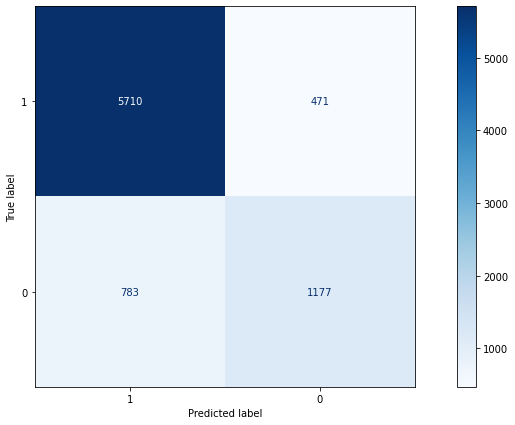

In [25]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gb_significantes, X_test_2, y_test_2, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

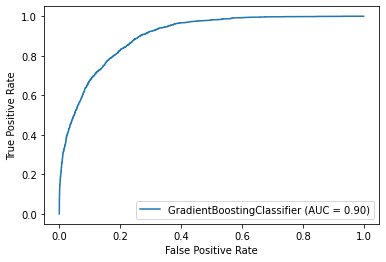

In [26]:
plot_roc_curve(gb_significantes, X_test_2, y_test_2)

# Persistiendo los modelos

In [27]:
import pickle

In [28]:
pickle.dump(gb_base, open("Modelos/GradientBoosting/gb_base.pickle", "wb"))
pickle.dump(gb_significantes, open("Modelos/GradientBoosting/gb_significantes.pickle", "wb"))

# Predicción de HoldOut


Usaremos para predecir el GradientBoosting obtenido para el preprocessing base.

In [29]:
gb_base = pickle.load(open("Modelos/GradientBoosting/gb_base.pickle", "rb"))

In [29]:
def holdout():
    ids, X = utils.get_holdout_data()
    X, _ = preprocessing.preprocessing_base_parte_1(X, X)
    return ids, X

In [30]:
ids, X = holdout()

In [31]:
utils.escribir_holdout(gb_base.predict(X), "8 - GradientBoosting", ids)